In [87]:
import pandas as pd
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.discovery import build
import pickle
import os.path

def get_google_sheet_data(spreadsheet_id, range_name):
    """
    Read data from a private Google Sheet using OAuth2 authentication.
    
    Parameters:
    spreadsheet_id (str): The ID of the spreadsheet (from the URL)
    range_name (str): The range to read (e.g., 'Sheet1!A1:D10')
    
    Returns:
    pandas.DataFrame: The sheet data as a DataFrame
    """
    # If modifying these scopes, delete the token.pickle file
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
    creds = None

    # Load existing credentials from token.pickle
    if os.path.exists('../resources/token.pickle'):
        with open('../resources/token.pickle', 'rb') as token:
            creds = pickle.load(token)

    # If credentials don't exist or are invalid, get new ones
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            # Load client secrets from your downloaded credentials file
            flow = InstalledAppFlow.from_client_secrets_file(
                '../resources/credentials.json',  # Download this from Google Cloud Console
                SCOPES
            )
            creds = flow.run_local_server(port=0)
            
        # Save credentials for future use
        with open('../resources/token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    # Build the Sheets API service
    service = build('sheets', 'v4', credentials=creds)

    try:
        # Call the Sheets API to get the data
        sheet = service.spreadsheets()
        result = sheet.values().get(
            spreadsheetId=spreadsheet_id,
            range=range_name
        ).execute()
        
        values = result.get('values', [])
        
        if not values:
            raise ValueError('No data found in the specified range.')
            
        # Convert to DataFrame
        df = pd.DataFrame(values[1:], columns=values[0])
        
        return df
        
    except Exception as e:
        print(f"An error occurred: {e}")
        raise

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import json

with open("../resources/google-sheet-707.json") as f:
    workbook707 = json.load(f)

# IST707 Grades


In [89]:
from datetime import datetime
current_date = datetime.now().strftime('%Y-%m-%d')
print(f"Last update: {current_date}")

Last update: 2025-03-17


## Participation Grades

In [90]:
roster = get_google_sheet_data(workbook707['id'],workbook707['roster'])[['github_id','public_id']]
participation_grades= get_google_sheet_data(workbook707['id'],workbook707['participation'])

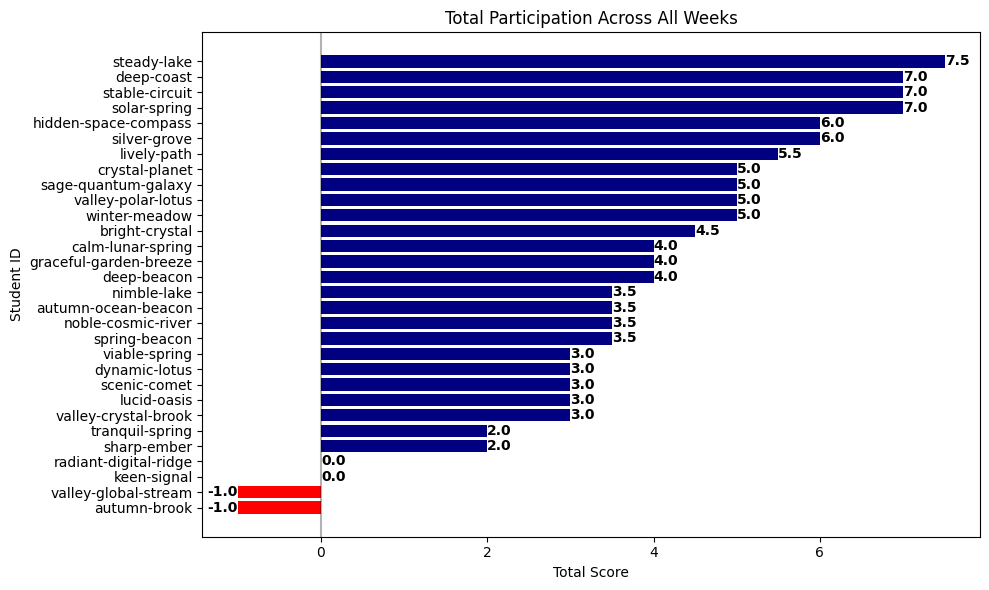

In [91]:
week_columns = [col for col in participation_grades if col.startswith('Week')]
final_participation = participation_grades.merge(roster,on="github_id").drop("github_id",axis=1)
final_participation['total_score'] = final_participation[week_columns].astype(float).sum(axis=1)
final_participation.sort_values('total_score',inplace=True)


plt.figure(figsize=(10,6))

# Create horizontal bars with different colors for positive/negative
colors = ['red' if x < 0 else 'navy' for x in final_participation['total_score']]
bars = plt.barh(final_participation['public_id'], final_participation['total_score'], color=colors)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels at the end of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', 
             ha='left' if width >= 0 else 'right',
             va='center',
             fontweight='bold')

plt.title('Total Participation Across All Weeks')
plt.xlabel('Total Score')
plt.ylabel('Student ID')
plt.tight_layout()
plt.show()

## Weekly Exercise Grades

In [92]:
weekly_grades = pd.read_csv("../IST707/grades/SU-IST707-SP25/master/all_weekly_grades.csv").fillna(0)


final_weekly = weekly_grades.merge(roster,left_on="Student",right_on="github_id").drop(["Student","github_id"],axis=1)
final_weekly

,weekly3,weekly4,weekly6,weekly7,public_id
0,1.0,1.0,0.0,1.0,radiant-digital-ridge
1,1.0,1.0,1.0,1.0,steady-lake
2,1.0,1.0,1.0,1.0,autumn-ocean-beacon
3,1.0,1.0,1.0,1.0,deep-beacon
4,1.0,1.0,1.0,1.0,valley-polar-lotus
5,1.0,1.0,1.0,1.0,tranquil-spring
6,1.0,0.0,1.0,1.0,valley-crystal-brook
7,1.0,1.0,1.0,1.0,deep-coast
8,1.0,1.0,1.0,1.0,dynamic-lotus
9,1.0,1.0,1.0,1.0,noble-cosmic-river


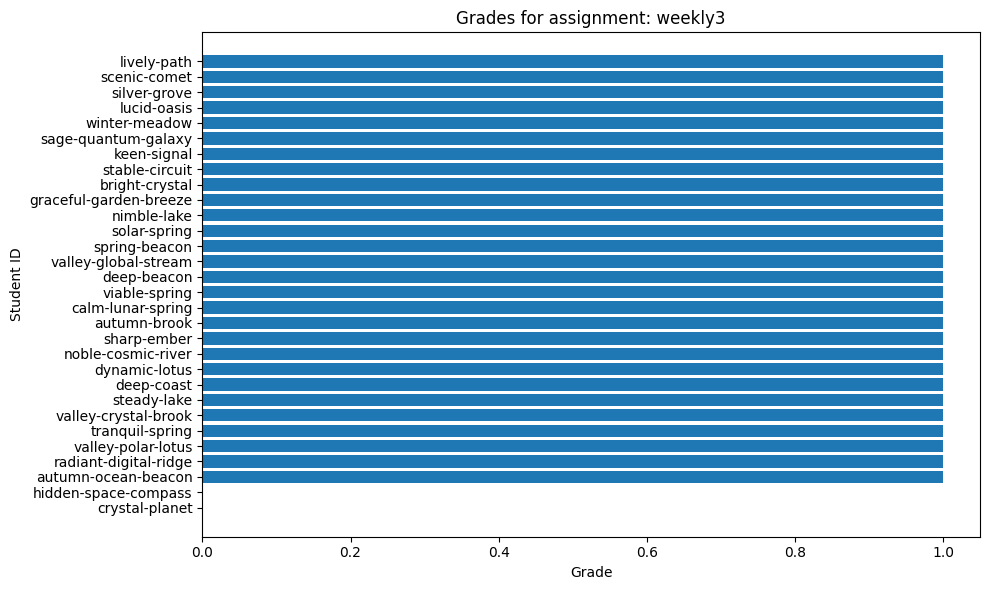

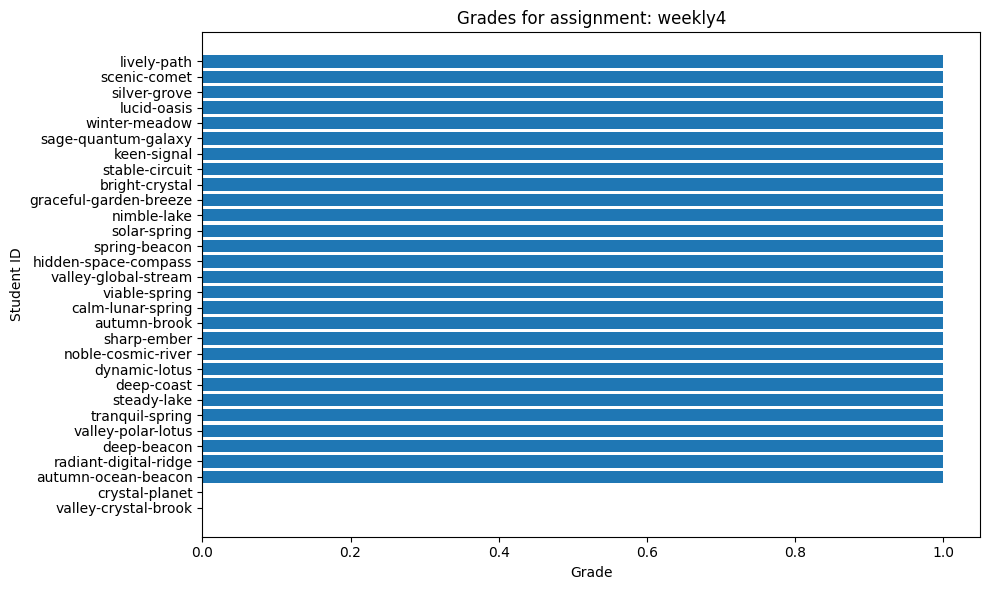

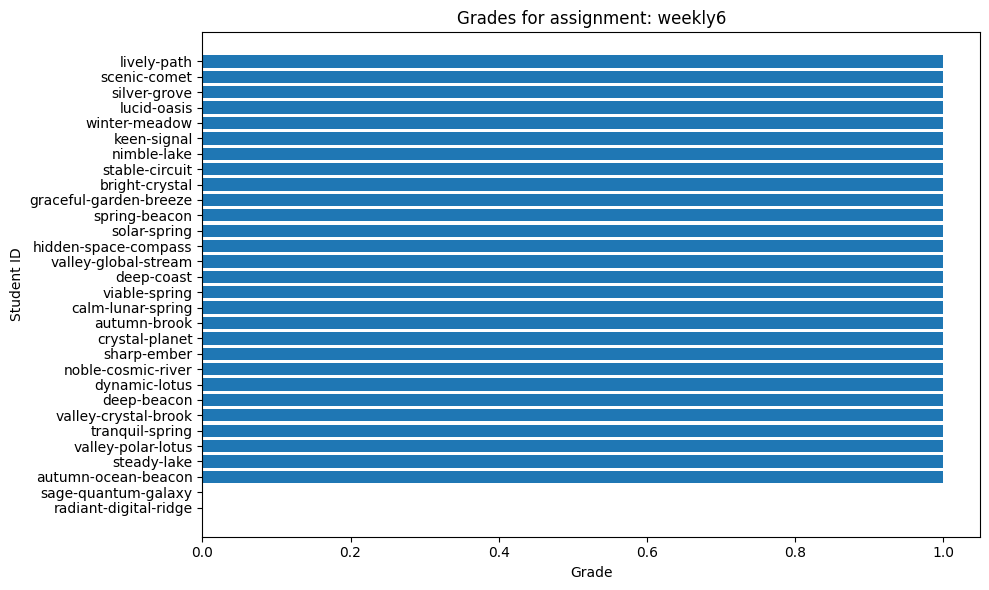

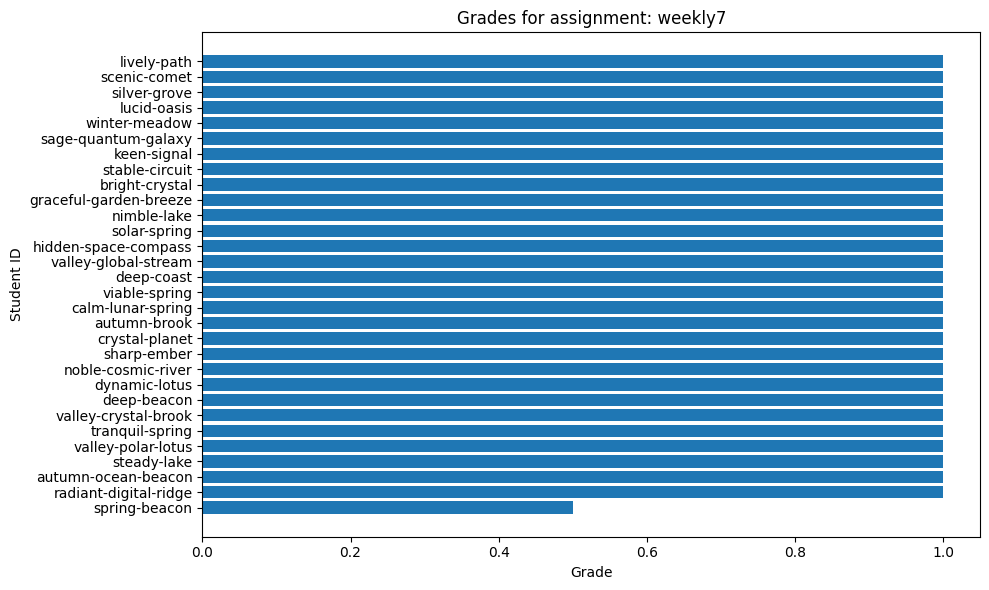

In [93]:

for col in [x for x in weekly_grades.columns if x!="Student"]:
    df = final_weekly.sort_values(col)  # Changed to True for better readability
    plt.figure(figsize=(10,6))  # Added to make labels more readable
    plt.barh(df["public_id"], df[col])
    plt.title(f"Grades for assignment: {col}")
    plt.xlabel("Grade")
    plt.ylabel("Student ID")
    plt.tight_layout()  # Added to prevent label cutoff
    plt.show()


### Weekly grade summary

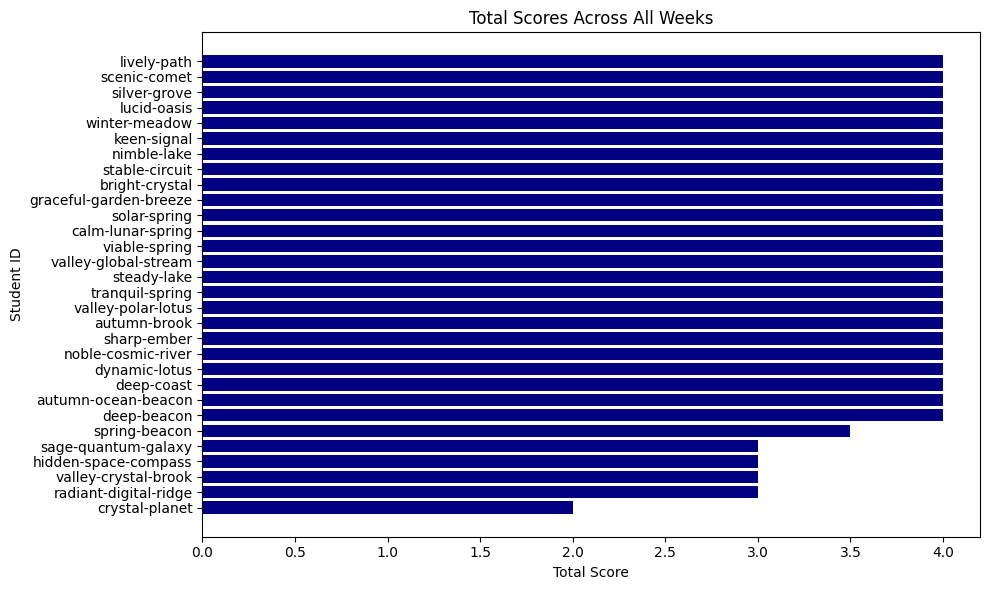

In [94]:
week_columns = [col for col in final_weekly.columns if col.startswith('weekly')]
final_weekly['total_score'] = final_weekly[week_columns].sum(axis=1)
final_weekly.sort_values('total_score',inplace=True)
plt.figure(figsize=(10,6))
plt.barh(final_weekly['public_id'], final_weekly['total_score'], color='navy')
plt.title('Total Scores Across All Weeks')
plt.xlabel('Total Score')
plt.ylabel('Student ID')
plt.tight_layout()
plt.show()

## Homework Grades

In [95]:
hw_grades = pd.read_csv("../IST707/grades/SU-IST707-SP25/master/all_hw_grades.csv").fillna(0)
final_hw = hw_grades.merge(roster,left_on="Student",right_on="github_id").drop(["Student","github_id"],axis=1)
hw_columns = [col for col in final_hw.columns if col.startswith('hw')]
final_hw['total_score'] = final_hw[hw_columns].sum(axis=1)
final_hw

,hw1,hw2,public_id,total_score
0,10.0,8.0,sharp-ember,18.0
1,9.0,8.0,deep-coast,17.0
2,10.0,8.0,calm-lunar-spring,18.0
3,9.0,10.0,spring-beacon,19.0
4,9.0,0.0,crystal-planet,9.0
5,8.0,8.0,silver-grove,16.0
6,10.0,9.0,hidden-space-compass,19.0
7,10.0,9.0,nimble-lake,19.0
8,10.0,8.0,scenic-comet,18.0
9,9.0,10.0,tranquil-spring,19.0


### HW Summary

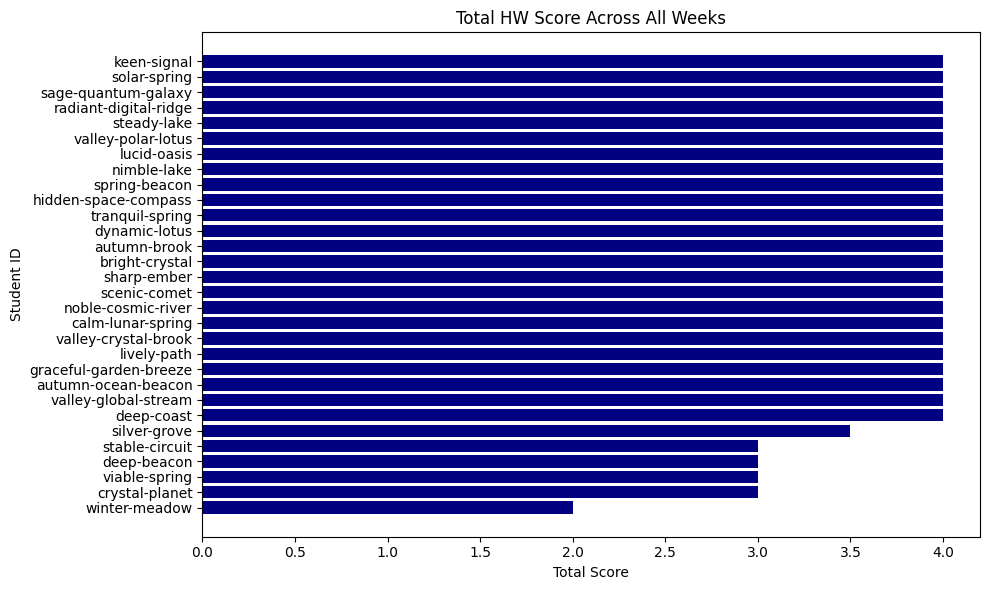

In [96]:
final_hw.sort_values('total_score',inplace=True)
plt.figure(figsize=(10,6))
plt.barh(final_hw['public_id'], final_weekly['total_score'], color='navy')
plt.title('Total HW Score Across All Weeks')
plt.xlabel('Total Score')
plt.ylabel('Student ID')
plt.tight_layout()
plt.show()

## Project Grades

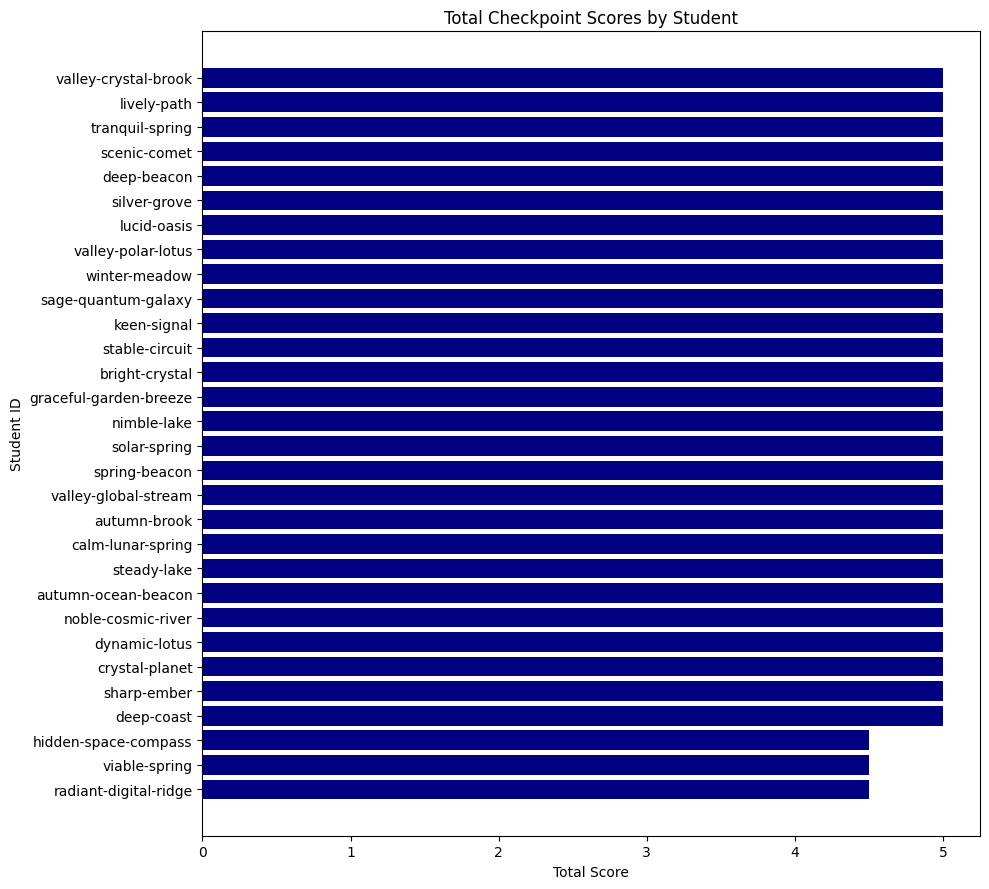

In [97]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

def process_student_checkpoints(base_dir, df_teams):
    # Initialize dictionary to store scores
    scores_dict = {student: {} for student in df_teams['public_id']}
    
    # Get all checkpoint numbers across all teams
    all_checkpoints = set()
    
    # Process each team's directory
    for team in df_teams['project_team'].unique():
        team_dir = f'{base_dir}/{team}'
        
        if not os.path.exists(team_dir):
            continue
            
        # Find all checkpoint directories
        checkpoint_dirs = [d for d in os.listdir(team_dir) 
                         if d.startswith('checkpoint') and os.path.isdir(os.path.join(team_dir, d))]
        
        for cp_dir in checkpoint_dirs:
            checkpoint_num = re.search(r'checkpoint(\d+)', cp_dir).group(1)
            all_checkpoints.add(int(checkpoint_num))
            
            feedback_path = os.path.join(team_dir, cp_dir, 'feedback.md')
            if not os.path.exists(feedback_path):
                continue
                
            # Read and extract score
            with open(feedback_path, 'r') as f:
                content = f.read()
                score_match = re.search(r'SCORE:\s*(\d+\.?\d*)', content)
                if score_match:
                    score = float(score_match.group(1))
                    
                    # Assign score to all team members
                    team_members = df_teams[df_teams['project_team'] == team]['public_id']
                    for student in team_members:
                        scores_dict[student][f'checkpoint{checkpoint_num}'] = score

    # Create DataFrame with scores
    checkpoint_cols = [f'checkpoint{i}' for i in sorted(all_checkpoints)]
    df_project = pd.DataFrame(index=df_teams['public_id'])
    
    for col in checkpoint_cols:
        df_project[col] = df_project.index.map(lambda x: scores_dict[x].get(col, 0))
    
    #df_project.index.name = 'student'
    
    # Calculate total scores and sort
    df_project['total'] = df_project.sum(axis=1)
    df_project = df_project.sort_values('total', ascending=True)
    
    # Create horizontal bar plot
    plt.figure(figsize=(10, max(8, len(df_project) * 0.3)))
    plt.barh(df_project.index, df_project['total'], color='navy')
    plt.xlabel('Total Score')
    plt.ylabel('Student ID')
    plt.title('Total Checkpoint Scores by Student')
    plt.tight_layout()
    
    return df_project



project_roster = get_google_sheet_data(workbook707['id'],workbook707['roster'])[['github_id','public_id','project_team']]

df_project = process_student_checkpoints('../IST707/student-group-project-submissions', project_roster)
plt.show()

## Overall Grades

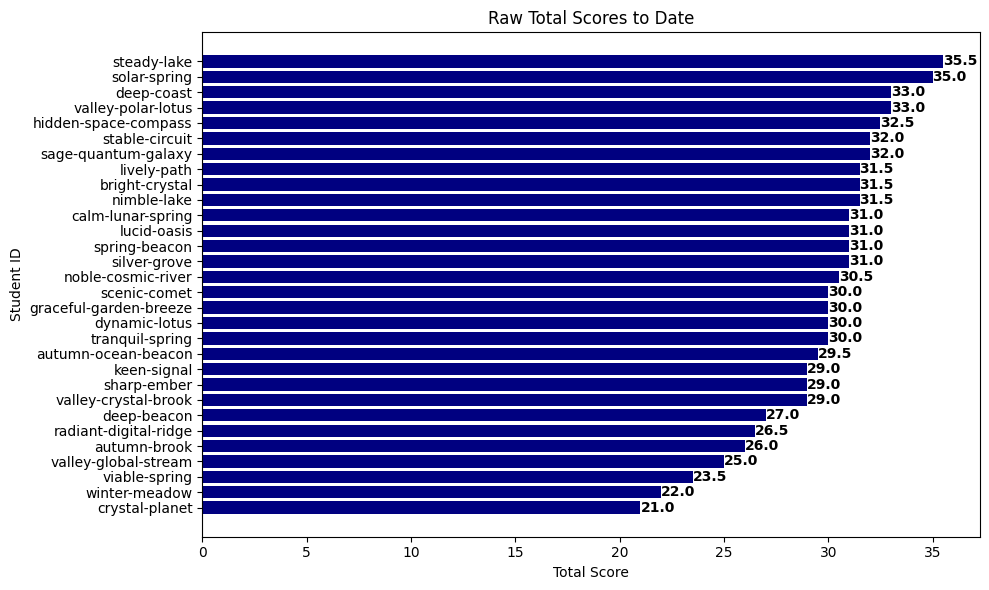

In [98]:
df_participation = final_participation[['public_id','total_score']]
df_weekly = final_weekly[['public_id','total_score']]

merged = df_participation.merge(df_weekly,on="public_id").\
        merge(df_project.reset_index()[['public_id','total']]).\
        merge(final_hw[['public_id','total_score']])

score_cols = [col for col in merged.columns if col.startswith("total")]
merged["final_score"] = merged[score_cols].sum(axis=1)
merged.sort_values('final_score',inplace=True)

plt.figure(figsize=(10,6))

# Create horizontal bars with different colors for positive/negative
colors = ['red' if x < 0 else 'navy' for x in merged['final_score']]
bars = plt.barh(merged['public_id'], merged['final_score'], color=colors)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels at the end of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', 
             ha='left' if width >= 0 else 'right',
             va='center',
             fontweight='bold')

plt.title('Raw Total Scores to Date')
plt.xlabel('Total Score')
plt.ylabel('Student ID')
plt.tight_layout()
plt.show()